In [1]:
#Importing all the libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('/kaggle/input/dataset-mba-decision-after-bachelors/mba_decision_dataset.csv')
df.drop(['Person ID'], axis=1, inplace=True) #Removing the index column
df.head()

,Age,Gender,Undergraduate Major,Undergraduate GPA,Years of Work Experience,Current Job Title,Annual Salary (Before MBA),Has Management Experience,GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,MBA Funding Source,Desired Post-MBA Role,Expected Post-MBA Salary,Location Preference (Post-MBA),Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
0,27,Male,Arts,3.18,8,Entrepreneur,90624,No,688,185,7.9,7.6,Loan,Finance Manager,156165,International,Entrepreneurship,On-Campus,Yes
1,24,Male,Arts,3.03,4,Analyst,53576,Yes,791,405,3.8,4.1,Loan,Startup Founder,165612,International,Career Growth,Online,No
2,33,Female,Business,3.66,9,Engineer,79796,No,430,107,6.7,5.5,Scholarship,Consultant,122248,Domestic,Skill Enhancement,Online,No
3,31,Male,Engineering,2.46,1,Manager,105956,No,356,257,1.0,5.3,Loan,Consultant,123797,International,Entrepreneurship,On-Campus,No
4,28,Female,Business,2.75,9,Entrepreneur,96132,No,472,338,9.5,4.9,Loan,Consultant,197509,Domestic,Skill Enhancement,Online,Yes


In [3]:
df.shape

(10000, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             10000 non-null  int64  
 1   Gender                          10000 non-null  object 
 2   Undergraduate Major             10000 non-null  object 
 3   Undergraduate GPA               10000 non-null  float64
 4   Years of Work Experience        10000 non-null  int64  
 5   Current Job Title               10000 non-null  object 
 6   Annual Salary (Before MBA)      10000 non-null  int64  
 7   Has Management Experience       10000 non-null  object 
 8   GRE/GMAT Score                  10000 non-null  int64  
 9   Undergrad University Ranking    10000 non-null  int64  
 10  Entrepreneurial Interest        10000 non-null  float64
 11  Networking Importance           10000 non-null  float64
 12  MBA Funding Source              1

In [5]:
df.isnull().sum()

Age                               0
Gender                            0
Undergraduate Major               0
Undergraduate GPA                 0
Years of Work Experience          0
Current Job Title                 0
Annual Salary (Before MBA)        0
Has Management Experience         0
GRE/GMAT Score                    0
Undergrad University Ranking      0
Entrepreneurial Interest          0
Networking Importance             0
MBA Funding Source                0
Desired Post-MBA Role             0
Expected Post-MBA Salary          0
Location Preference (Post-MBA)    0
Reason for MBA                    0
Online vs. On-Campus MBA          0
Decided to Pursue MBA?            0
dtype: int64

In [6]:
df.dtypes

Age                                 int64
Gender                             object
Undergraduate Major                object
Undergraduate GPA                 float64
Years of Work Experience            int64
Current Job Title                  object
Annual Salary (Before MBA)          int64
Has Management Experience          object
GRE/GMAT Score                      int64
Undergrad University Ranking        int64
Entrepreneurial Interest          float64
Networking Importance             float64
MBA Funding Source                 object
Desired Post-MBA Role              object
Expected Post-MBA Salary            int64
Location Preference (Post-MBA)     object
Reason for MBA                     object
Online vs. On-Campus MBA           object
Decided to Pursue MBA?             object
dtype: object

### Data Distribution

In [7]:
df.describe()

,Age,Undergraduate GPA,Years of Work Experience,Annual Salary (Before MBA),GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,Expected Post-MBA Salary
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000
mean,27.494300,2.991611,4.53350,75166.406400,524.44690,247.03620,5.477830,5.522170,130321.228900
std,4.031823,0.573509,2.86166,25850.070599,158.06376,144.87624,2.585864,2.588422,40598.421993
min,21.000000,2.000000,0.00000,30013.000000,250.00000,1.00000,1.000000,1.000000,60001.000000
25%,24.000000,2.490000,2.00000,52862.000000,390.00000,121.00000,3.200000,3.300000,95320.500000
50%,27.000000,2.990000,5.00000,74829.500000,524.00000,243.00000,5.500000,5.500000,130155.500000
75%,31.000000,3.480000,7.00000,97273.000000,661.00000,373.00000,7.700000,7.700000,165757.000000
max,34.000000,4.000000,9.00000,119966.000000,799.00000,499.00000,10.000000,10.000000,199999.000000


In [8]:
df.nunique()

Age                                 14
Gender                               3
Undergraduate Major                  5
Undergraduate GPA                  201
Years of Work Experience            10
Current Job Title                    5
Annual Salary (Before MBA)        9456
Has Management Experience            2
GRE/GMAT Score                     550
Undergrad University Ranking       499
Entrepreneurial Interest            91
Networking Importance               91
MBA Funding Source                   4
Desired Post-MBA Role                5
Expected Post-MBA Salary          9614
Location Preference (Post-MBA)       2
Reason for MBA                       4
Online vs. On-Campus MBA             2
Decided to Pursue MBA?               2
dtype: int64

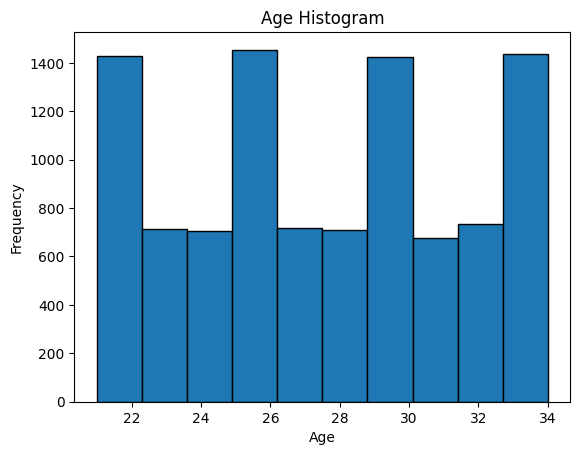

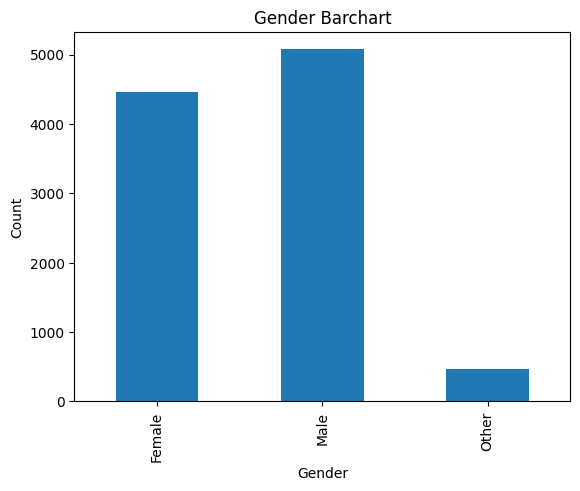

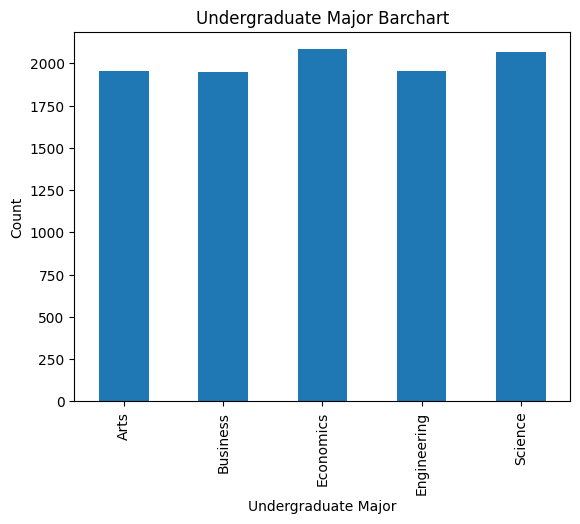

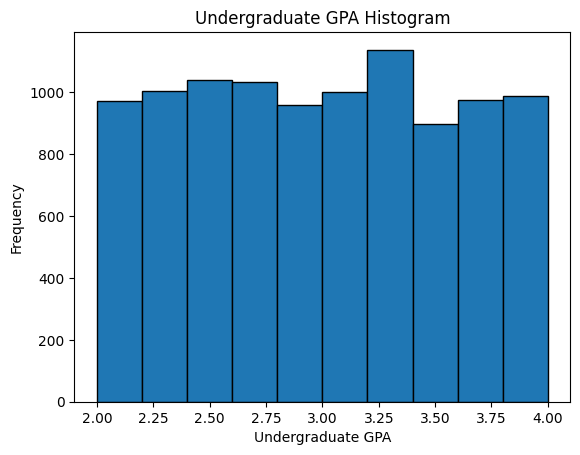

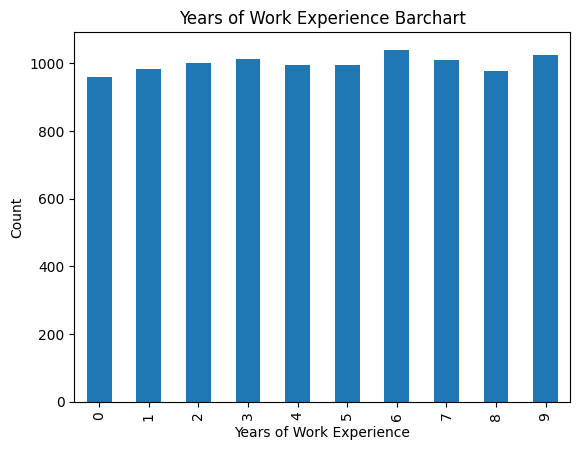

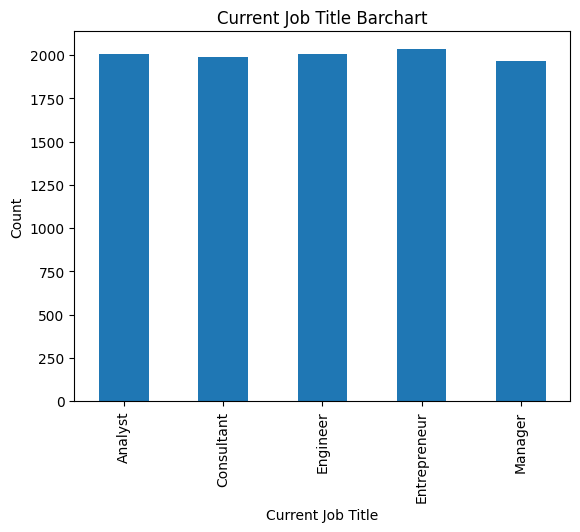

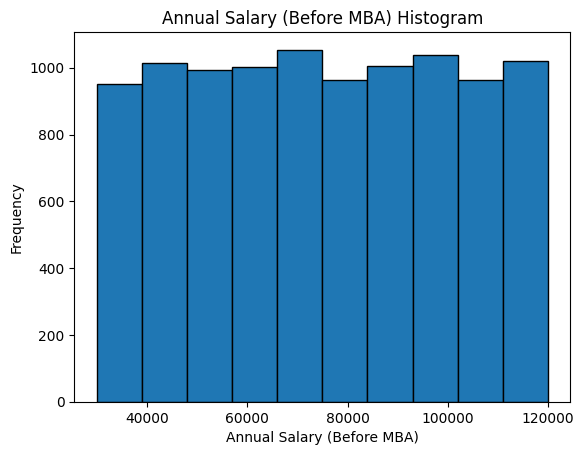

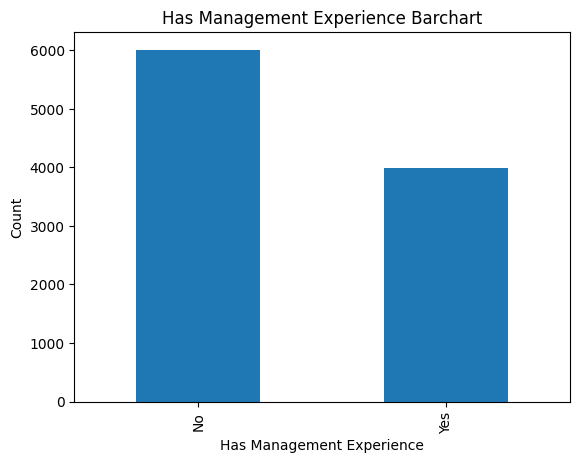

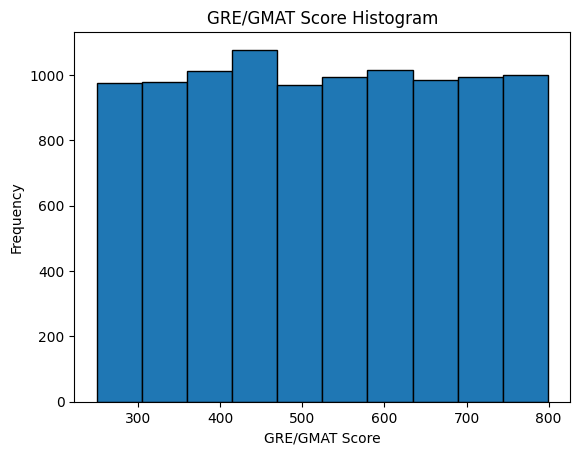

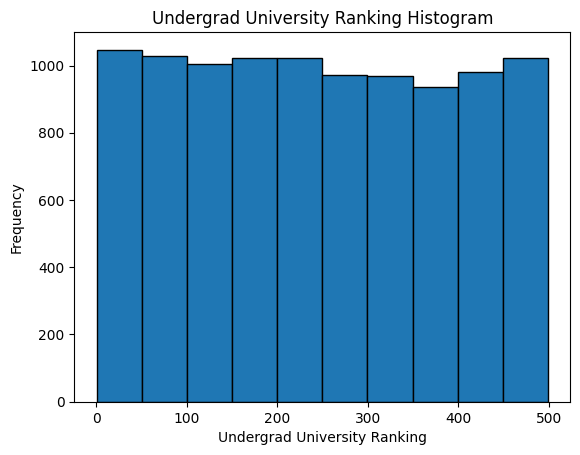

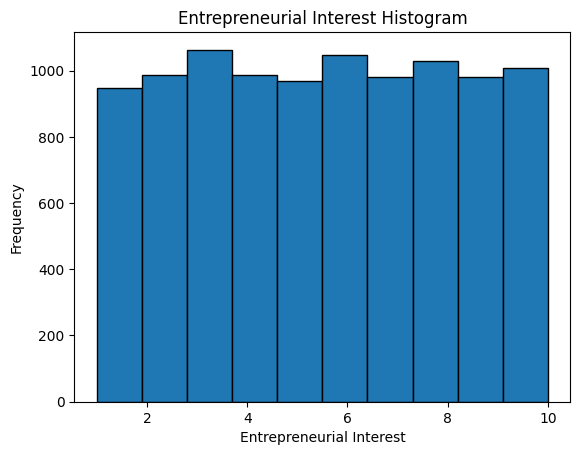

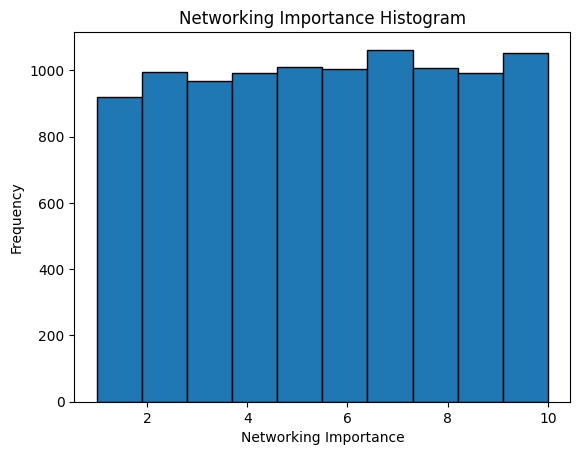

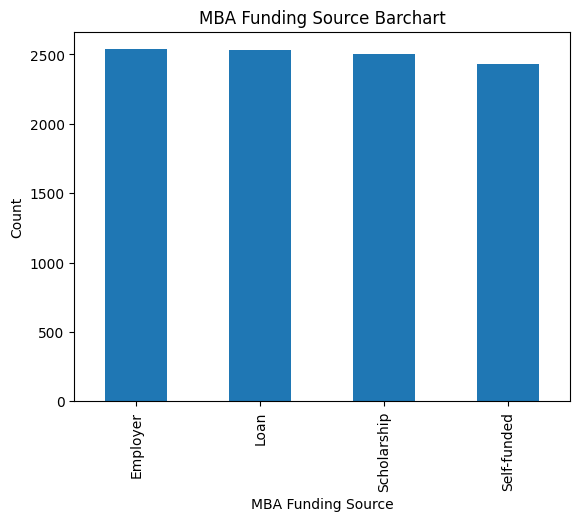

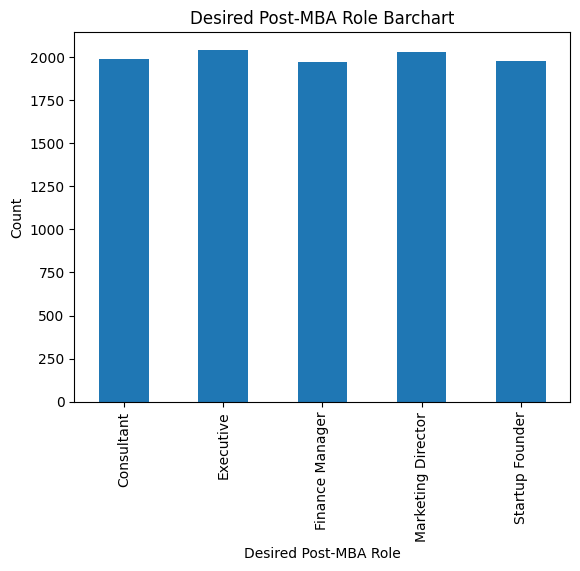

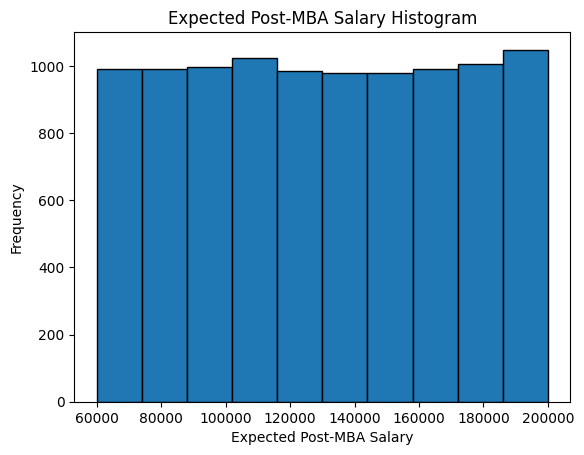

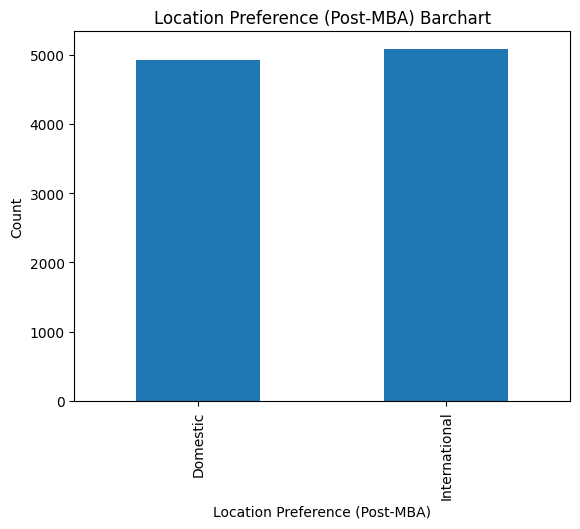

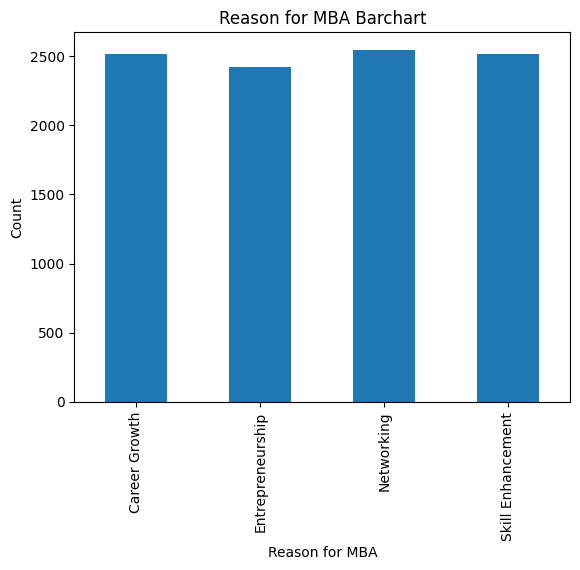

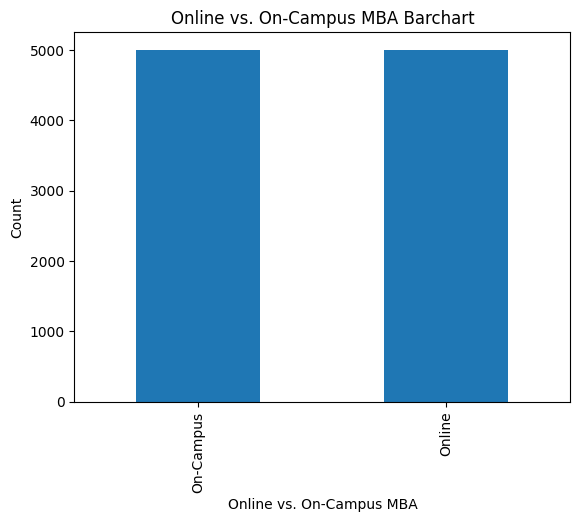

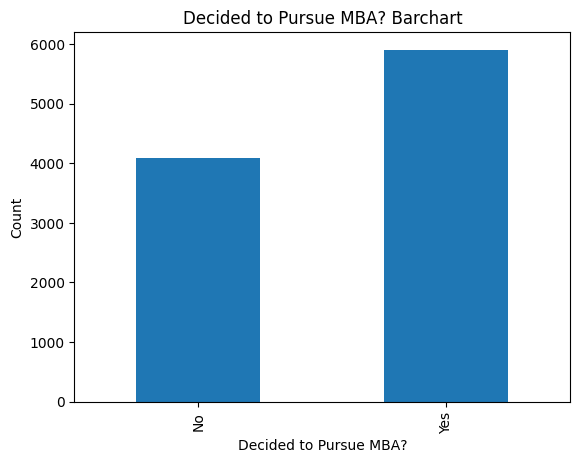

In [9]:
for i in range(len(df.columns)):
    if df[df.columns[i]].nunique() > 10:
        df[df.columns[i]].plot(kind='hist', edgecolor='black')
        plt.xlabel(df.columns[i])
        plt.title(df.columns[i] + " Histogram")
        plt.show()
    else:
        df.groupby(df.columns[i])[df.columns[i]].count().plot(kind='bar')
        plt.xlabel(df.columns[i])
        plt.ylabel('Count')
        plt.title(df.columns[i] + " Barchart")
        plt.show()

### Check the corelations

In [10]:
#Convert into numerical form

le = LabelEncoder()
df_lbl_encod = df.copy()

for i in df.columns[df.dtypes=='object']:
    df_lbl_encod[i] = le.fit_transform(df[i])
    
df_lbl_encod.head()

,Age,Gender,Undergraduate Major,Undergraduate GPA,Years of Work Experience,Current Job Title,Annual Salary (Before MBA),Has Management Experience,GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,MBA Funding Source,Desired Post-MBA Role,Expected Post-MBA Salary,Location Preference (Post-MBA),Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
0,27,1,0,3.18,8,3,90624,0,688,185,7.9,7.6,1,2,156165,1,1,0,1
1,24,1,0,3.03,4,0,53576,1,791,405,3.8,4.1,1,4,165612,1,0,1,0
2,33,0,1,3.66,9,2,79796,0,430,107,6.7,5.5,2,0,122248,0,3,1,0
3,31,1,3,2.46,1,4,105956,0,356,257,1.0,5.3,1,0,123797,1,1,0,0
4,28,0,1,2.75,9,3,96132,0,472,338,9.5,4.9,1,0,197509,0,3,1,1


In [11]:
df_lbl_encod.corr()

,Age,Gender,Undergraduate Major,Undergraduate GPA,Years of Work Experience,Current Job Title,Annual Salary (Before MBA),Has Management Experience,GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,MBA Funding Source,Desired Post-MBA Role,Expected Post-MBA Salary,Location Preference (Post-MBA),Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
Age,1.000000,-0.001644,0.000795,0.014800,-0.000798,-0.006392,0.011386,0.005230,0.002036,-0.003281,0.009805,-0.006841,-0.016195,0.005954,0.016200,0.008160,-0.000303,-0.015975,0.000614
Gender,-0.001644,1.000000,-0.013821,0.005598,-0.005432,0.015173,-0.012550,-0.006506,0.003192,-0.015647,-0.014974,0.013788,-0.017582,0.001107,-0.003292,0.001608,-0.010406,-0.000172,-0.001175
Undergraduate Major,0.000795,-0.013821,1.000000,-0.000943,0.004338,0.007104,0.004483,0.023957,-0.010284,-0.007774,-0.001975,-0.002720,0.002411,-0.011746,-0.011762,0.010208,-0.009860,0.013743,0.015326
Undergraduate GPA,0.014800,0.005598,-0.000943,1.000000,-0.010385,-0.001468,0.002331,-0.002126,0.013235,0.002768,0.013961,0.011949,0.004362,0.001044,-0.000869,-0.002364,-0.002629,-0.001063,-0.008400
Years of Work Experience,-0.000798,-0.005432,0.004338,-0.010385,1.000000,-0.014249,-0.022053,-0.013501,0.015480,0.005455,0.012334,-0.002261,-0.013980,-0.005546,-0.002337,-0.007255,0.009766,0.006023,-0.005571
Current Job Title,-0.006392,0.015173,0.007104,-0.001468,-0.014249,1.000000,-0.009032,-0.014270,-0.011027,-0.016276,-0.014093,-0.000392,-0.007946,-0.001812,-0.022141,-0.001310,-0.002613,-0.026998,0.005377
Annual Salary (Before MBA),0.011386,-0.012550,0.004483,0.002331,-0.022053,-0.009032,1.000000,-0.010309,-0.005471,-0.000487,-0.000219,0.002444,-0.000903,-0.006704,0.019473,-0.010305,-0.018313,0.013300,-0.000797
Has Management Experience,0.005230,-0.006506,0.023957,-0.002126,-0.013501,-0.014270,-0.010309,1.000000,-0.000269,0.002537,0.000701,0.014076,0.012662,-0.006080,-0.010460,-0.003523,0.003525,-0.003065,-0.006846
GRE/GMAT Score,0.002036,0.003192,-0.010284,0.013235,0.015480,-0.011027,-0.005471,-0.000269,1.000000,-0.003357,-0.019938,-0.006448,-0.005475,-0.015152,0.003743,0.017606,-0.009632,0.018841,-0.002650
Undergrad University Ranking,-0.003281,-0.015647,-0.007774,0.002768,0.005455,-0.016276,-0.000487,0.002537,-0.003357,1.000000,0.008953,-0.000274,0.018509,0.003209,0.011014,0.001120,-0.002343,0.005509,0.005200


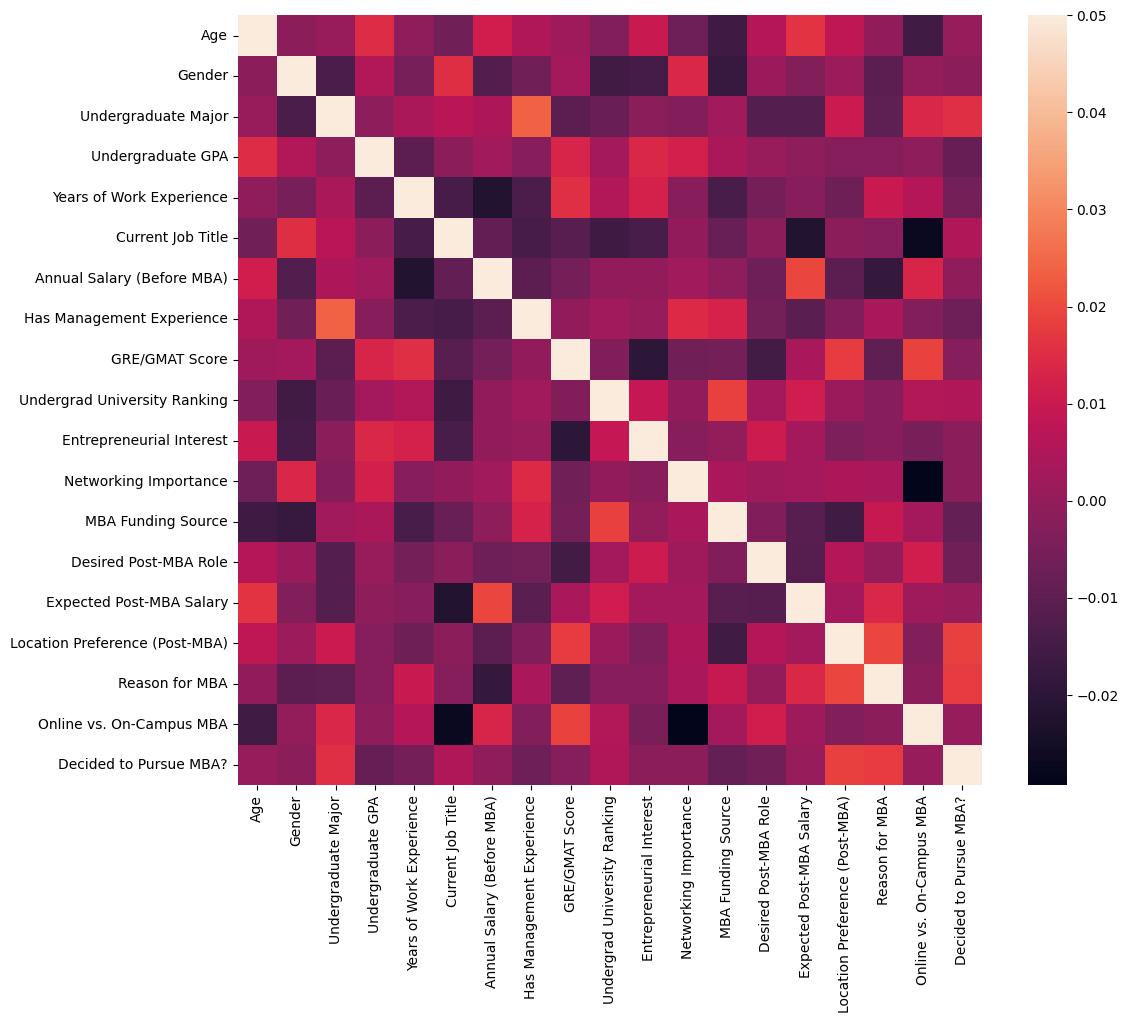

In [12]:
min_v = -0.029319661463998347
max_v = 0.05

plt.figure(figsize=(12, 10), dpi=100)
sns.heatmap(df_lbl_encod.corr(), vmin=min_v, vmax=max_v, annot=False)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [13]:
df_lbl_encod.corr()['Decided to Pursue MBA?'].sort_values()

MBA Funding Source               -0.008745
Undergraduate GPA                -0.008400
Has Management Experience        -0.006846
Desired Post-MBA Role            -0.006092
Years of Work Experience         -0.005571
GRE/GMAT Score                   -0.002650
Entrepreneurial Interest         -0.001844
Networking Importance            -0.001301
Gender                           -0.001175
Annual Salary (Before MBA)       -0.000797
Online vs. On-Campus MBA          0.000591
Age                               0.000614
Expected Post-MBA Salary          0.000723
Undergrad University Ranking      0.005200
Current Job Title                 0.005377
Undergraduate Major               0.015326
Reason for MBA                    0.017635
Location Preference (Post-MBA)    0.018498
Decided to Pursue MBA?            1.000000
Name: Decided to Pursue MBA?, dtype: float64

### Feature Engineering

In [14]:
df['Salary raise after MBA'] = df['Expected Post-MBA Salary'] - df['Annual Salary (Before MBA)']

In [15]:
le = LabelEncoder()
df_lbl_encod = df.copy()

for i in df.columns[df.dtypes=='object']:
    df_lbl_encod[i] = le.fit_transform(df[i])
    
df_lbl_encod.corr()['Decided to Pursue MBA?'].sort_values()

MBA Funding Source               -0.008745
Undergraduate GPA                -0.008400
Has Management Experience        -0.006846
Desired Post-MBA Role            -0.006092
Years of Work Experience         -0.005571
GRE/GMAT Score                   -0.002650
Entrepreneurial Interest         -0.001844
Networking Importance            -0.001301
Gender                           -0.001175
Annual Salary (Before MBA)       -0.000797
Online vs. On-Campus MBA          0.000591
Age                               0.000614
Expected Post-MBA Salary          0.000723
Salary raise after MBA            0.001047
Undergrad University Ranking      0.005200
Current Job Title                 0.005377
Undergraduate Major               0.015326
Reason for MBA                    0.017635
Location Preference (Post-MBA)    0.018498
Decided to Pursue MBA?            1.000000
Name: Decided to Pursue MBA?, dtype: float64

The output shows that none of the factors have a strong connection to that decision, but some, like where someone wants to work after the MBA, might be slightly more related than others. 

In [16]:
df.drop(['Expected Post-MBA Salary', 'Annual Salary (Before MBA)'], axis='columns', inplace=True)
df.head()

,Age,Gender,Undergraduate Major,Undergraduate GPA,Years of Work Experience,Current Job Title,Has Management Experience,GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,MBA Funding Source,Desired Post-MBA Role,Location Preference (Post-MBA),Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?,Salary raise after MBA
0,27,Male,Arts,3.18,8,Entrepreneur,No,688,185,7.9,7.6,Loan,Finance Manager,International,Entrepreneurship,On-Campus,Yes,65541
1,24,Male,Arts,3.03,4,Analyst,Yes,791,405,3.8,4.1,Loan,Startup Founder,International,Career Growth,Online,No,112036
2,33,Female,Business,3.66,9,Engineer,No,430,107,6.7,5.5,Scholarship,Consultant,Domestic,Skill Enhancement,Online,No,42452
3,31,Male,Engineering,2.46,1,Manager,No,356,257,1.0,5.3,Loan,Consultant,International,Entrepreneurship,On-Campus,No,17841
4,28,Female,Business,2.75,9,Entrepreneur,No,472,338,9.5,4.9,Loan,Consultant,Domestic,Skill Enhancement,Online,Yes,101377


### Checking the outliers

In [17]:
all_stats = df.describe()
columns = all_stats.columns
all_stats

,Age,Undergraduate GPA,Years of Work Experience,GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,Salary raise after MBA
count,10000.000000,10000.000000,10000.00000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000
mean,27.494300,2.991611,4.53350,524.44690,247.03620,5.477830,5.522170,55154.822500
std,4.031823,0.573509,2.86166,158.06376,144.87624,2.585864,2.588422,47703.090765
min,21.000000,2.000000,0.00000,250.00000,1.00000,1.000000,1.000000,-59339.000000
25%,24.000000,2.490000,2.00000,390.00000,121.00000,3.200000,3.300000,19854.750000
50%,27.000000,2.990000,5.00000,524.00000,243.00000,5.500000,5.500000,55250.500000
75%,31.000000,3.480000,7.00000,661.00000,373.00000,7.700000,7.700000,90909.250000
max,34.000000,4.000000,9.00000,799.00000,499.00000,10.000000,10.000000,169344.000000


In [18]:
error_min = []
error_max = []
for i in columns:
    iMin = all_stats[i].loc['25%']
    iMax = all_stats[i].loc['75%']
    iqr = iMax - iMin
    error_min.append(iMin-(1.5*iqr))
    error_max.append(iMax+(1.5*iqr))
    
df2_outlier_removed = df.copy()

In [19]:
counter = 0

for i in columns :
    df2_outlier_removed = df2_outlier_removed[(df2_outlier_removed[i] >= error_min[counter]) & (df2_outlier_removed[i] <= error_max[counter])]
    counter += 1

In [20]:
print(df2_outlier_removed.shape)
print(df.shape)

(10000, 18)
(10000, 18)


### Encording the catogorical data

In [21]:
df_num = df[df.columns[df.dtypes!='object']]
df_num

,Age,Undergraduate GPA,Years of Work Experience,GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,Salary raise after MBA
0,27,3.18,8,688,185,7.9,7.6,65541
1,24,3.03,4,791,405,3.8,4.1,112036
2,33,3.66,9,430,107,6.7,5.5,42452
3,31,2.46,1,356,257,1.0,5.3,17841
4,28,2.75,9,472,338,9.5,4.9,101377
...,...,...,...,...,...,...,...,...
9995,33,3.55,5,524,100,9.2,8.0,-40172
9996,30,2.48,5,330,362,7.4,8.5,48539
9997,31,2.86,8,681,308,6.8,8.8,66654
9998,22,2.30,1,481,190,5.7,7.7,53975


In [22]:
df_cat = df[df.columns[df.dtypes=='object']]
df_cat

,Gender,Undergraduate Major,Current Job Title,Has Management Experience,MBA Funding Source,Desired Post-MBA Role,Location Preference (Post-MBA),Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
0,Male,Arts,Entrepreneur,No,Loan,Finance Manager,International,Entrepreneurship,On-Campus,Yes
1,Male,Arts,Analyst,Yes,Loan,Startup Founder,International,Career Growth,Online,No
2,Female,Business,Engineer,No,Scholarship,Consultant,Domestic,Skill Enhancement,Online,No
3,Male,Engineering,Manager,No,Loan,Consultant,International,Entrepreneurship,On-Campus,No
4,Female,Business,Entrepreneur,No,Loan,Consultant,Domestic,Skill Enhancement,Online,Yes
...,...,...,...,...,...,...,...,...,...,...
9995,Female,Economics,Analyst,Yes,Loan,Startup Founder,International,Networking,Online,Yes
9996,Female,Business,Manager,Yes,Scholarship,Consultant,Domestic,Entrepreneurship,On-Campus,No
9997,Female,Economics,Manager,Yes,Loan,Consultant,Domestic,Networking,On-Campus,Yes
9998,Female,Arts,Engineer,No,Self-funded,Marketing Director,International,Networking,Online,Yes


In [23]:
df_cat.nunique()

Gender                            3
Undergraduate Major               5
Current Job Title                 5
Has Management Experience         2
MBA Funding Source                4
Desired Post-MBA Role             5
Location Preference (Post-MBA)    2
Reason for MBA                    4
Online vs. On-Campus MBA          2
Decided to Pursue MBA?            2
dtype: int64

In [24]:
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df_cat)

df_one_hot_encoded = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out())
df_one_hot_encoded

,Gender_Female,Gender_Male,Gender_Other,Undergraduate Major_Arts,Undergraduate Major_Business,Undergraduate Major_Economics,Undergraduate Major_Engineering,Undergraduate Major_Science,Current Job Title_Analyst,Current Job Title_Consultant,...,Location Preference (Post-MBA)_Domestic,Location Preference (Post-MBA)_International,Reason for MBA_Career Growth,Reason for MBA_Entrepreneurship,Reason for MBA_Networking,Reason for MBA_Skill Enhancement,Online vs. On-Campus MBA_On-Campus,Online vs. On-Campus MBA_Online,Decided to Pursue MBA?_No,Decided to Pursue MBA?_Yes
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
9996,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
9997,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
9998,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [25]:
df_encoded = pd.concat([df_num, df_one_hot_encoded], axis=1)
df_encoded.drop('Decided to Pursue MBA?_No', axis='columns', inplace=True)
df_encoded.head()

,Age,Undergraduate GPA,Years of Work Experience,GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,Salary raise after MBA,Gender_Female,Gender_Male,...,Desired Post-MBA Role_Startup Founder,Location Preference (Post-MBA)_Domestic,Location Preference (Post-MBA)_International,Reason for MBA_Career Growth,Reason for MBA_Entrepreneurship,Reason for MBA_Networking,Reason for MBA_Skill Enhancement,Online vs. On-Campus MBA_On-Campus,Online vs. On-Campus MBA_Online,Decided to Pursue MBA?_Yes
0,27,3.18,8,688,185,7.9,7.6,65541,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,24,3.03,4,791,405,3.8,4.1,112036,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,33,3.66,9,430,107,6.7,5.5,42452,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,31,2.46,1,356,257,1.0,5.3,17841,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,28,2.75,9,472,338,9.5,4.9,101377,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [26]:
df_encoded.columns

Index(['Age', 'Undergraduate GPA', 'Years of Work Experience',
       'GRE/GMAT Score', 'Undergrad University Ranking',
       'Entrepreneurial Interest', 'Networking Importance',
       'Salary raise after MBA', 'Gender_Female', 'Gender_Male',
       'Gender_Other', 'Undergraduate Major_Arts',
       'Undergraduate Major_Business', 'Undergraduate Major_Economics',
       'Undergraduate Major_Engineering', 'Undergraduate Major_Science',
       'Current Job Title_Analyst', 'Current Job Title_Consultant',
       'Current Job Title_Engineer', 'Current Job Title_Entrepreneur',
       'Current Job Title_Manager', 'Has Management Experience_No',
       'Has Management Experience_Yes', 'MBA Funding Source_Employer',
       'MBA Funding Source_Loan', 'MBA Funding Source_Scholarship',
       'MBA Funding Source_Self-funded', 'Desired Post-MBA Role_Consultant',
       'Desired Post-MBA Role_Executive',
       'Desired Post-MBA Role_Finance Manager',
       'Desired Post-MBA Role_Marketing Direct

### Split the data set

In [27]:
df_x = df_encoded.drop('Decided to Pursue MBA?_Yes', axis='columns')
df_y = df_encoded['Decided to Pursue MBA?_Yes']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, random_state=104,test_size=0.25,shuffle=True) 

In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500, 40)
(2500, 40)
(7500,)
(2500,)


### Feature Scalling

In [30]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scalled = scaler.transform(x_train)
pd.DataFrame(x_train_scalled).head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.861414,0.319456,1.212418,-0.434513,0.191798,-1.420868,0.348033,1.722406,-0.894347,0.984389,...,-0.502915,-0.498124,-0.976802,0.976802,-0.586794,-0.564621,-0.585767,1.747585,-1.000267,1.000267
1,1.360507,0.912609,-0.191710,1.277159,1.508679,-0.722472,-1.206867,-1.870671,-0.894347,0.984389,...,-0.502915,-0.498124,-0.976802,0.976802,-0.586794,-0.564621,-0.585767,1.747585,-1.000267,1.000267
2,0.126106,0.842826,-1.595838,-1.039007,0.757161,1.566713,-0.584907,-0.063248,1.118135,-1.015859,...,-0.502915,2.007531,-0.976802,0.976802,1.704176,-0.564621,-0.585767,-0.572218,0.999733,-0.999733
3,1.360507,0.459021,0.510354,1.563499,1.363891,-1.459667,0.192543,0.774253,1.118135,-1.015859,...,-0.502915,-0.498124,-0.976802,0.976802,-0.586794,-0.564621,-0.585767,1.747585,0.999733,-0.999733
4,-0.120774,0.371793,0.510354,1.175350,0.253850,-1.110470,-0.934760,-0.457214,1.118135,-1.015859,...,-0.502915,2.007531,-0.976802,0.976802,-0.586794,-0.564621,1.707163,-0.572218,-1.000267,1.000267


In [31]:
x_test_scalled = scaler.transform(x_test)
pd.DataFrame(x_test_scalled).head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.360507,-1.460003,-0.191710,-1.019917,0.508953,-0.994070,-0.973632,0.214245,-0.894347,-1.015859,...,-0.502915,2.007531,-0.976802,0.976802,1.704176,-0.564621,-0.585767,-0.572218,-1.000267,1.000267
1,0.619867,0.162445,-1.595838,-0.383608,1.005368,0.169922,-1.517848,0.630022,1.118135,-1.015859,...,-0.502915,-0.498124,-0.976802,0.976802,-0.586794,-0.564621,1.707163,-0.572218,-1.000267,1.000267
2,1.113627,-0.012012,-0.542742,-0.199078,-1.690444,1.023517,0.814504,0.618150,1.118135,-1.015859,...,1.988408,-0.498124,-0.976802,0.976802,1.704176,-0.564621,-0.585767,-0.572218,-1.000267,1.000267
3,0.126106,0.476467,1.212418,-1.414429,1.067420,0.519120,0.814504,0.672320,-0.894347,0.984389,...,-0.502915,2.007531,1.023749,-1.023749,-0.586794,-0.564621,1.707163,-0.572218,-1.000267,1.000267
4,0.126106,-1.093644,-1.244806,0.997183,-1.580130,-0.761272,-1.167995,-1.219762,1.118135,-1.015859,...,-0.502915,-0.498124,-0.976802,0.976802,-0.586794,1.771098,-0.585767,-0.572218,-1.000267,1.000267
